# Assignment: General Linear Regression

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import torch
import torch.nn as nn
print("Done")

Done


50 data points generated by adding Gaussian noise to the following function. <br><br>
$$
f(x_1,x_2) = a + b \cdot \exp(x_1) + c \cdot \sin(x_2) + d \cdot x_1 x_2
$$ <br>
$(a,b,c,d \in 𝐑$ and $x = [x_1, x_2]^T \in \mathbf R^2)$

## Objective
---
**Find the original values of the scalars $(a,b,c,d)$**

In [2]:
X_data = np.array([[ 9.55979024e-01,  7.69917408e-02],       [ 2.24092732e-03, -8.55897733e-01],       [-4.63122040e-01, -2.34998349e-04],       [ 3.58459992e-01,  6.07478072e-01],       [-2.38117734e-01, -8.68127306e-01],       [-4.23708801e-01,  8.19187055e-01],       [-5.73229293e-01, -9.57520764e-02],       [ 8.62412039e-01, -9.50201545e-01],       [ 2.01097835e-01,  9.00259001e-01],       [-5.39394242e-01,  9.69798385e-02],       [ 8.18256750e-01, -7.33661108e-01],       [ 4.68251613e-02,  5.00819718e-01],       [ 3.38026482e-01, -6.44942805e-02],       [-5.90301819e-01, -1.84682218e-02],       [-2.55230621e-01, -4.51976903e-02],       [-2.68219228e-01,  6.75835989e-01],       [ 5.37295013e-01, -3.72010646e-01],       [ 1.45250665e-01, -4.47901903e-01],       [-9.43141349e-02, -2.94043268e-01],       [ 3.14798926e-01, -2.59297834e-01],       [-8.18140442e-02,  4.38648245e-01],       [-1.74016342e-01,  8.12846538e-01],       [-6.39096762e-01,  4.82237746e-01],       [-1.55251913e-01, -1.47092855e-01],       [ 2.68759737e-01,  4.58124021e-02],       [-1.70228043e-01, -9.97146239e-01],       [-8.15475308e-01,  4.18788787e-01],       [ 4.86911935e-02,  3.92320927e-01],       [ 9.10936646e-01,  3.65827709e-01],       [-8.93742619e-01, -3.82294630e-01],       [ 1.85189375e-01, -5.29759185e-01],       [ 9.29941999e-01,  8.90096448e-01],       [ 6.96801762e-01, -5.53520074e-02],       [ 6.82953430e-01, -7.37778715e-01],       [-3.82532685e-01, -7.40072117e-02],       [ 4.83694401e-01, -2.83495426e-02],       [-7.26247762e-01, -3.12926941e-01],       [-3.51147661e-01, -3.99162191e-01],       [-6.68997199e-01, -1.70196455e-01],       [-1.03758685e-01,  5.49800752e-01],       [ 5.92781402e-01,  4.47802560e-02],       [-7.87394077e-02,  5.56427203e-01],       [ 7.74577904e-01,  3.49837540e-01],       [ 6.00958098e-01,  8.78222707e-01],       [-9.18688381e-01,  7.51343450e-01],       [-4.46873855e-01, -4.84710012e-02],       [ 5.93521914e-01,  4.34484465e-01],       [-7.05704856e-01,  3.17496518e-01],       [-8.61495860e-01, -2.85858743e-01],       [ 6.25659100e-01, -1.44590334e-01]])
Y_data = np.array([[ 6.22063751],       [ 0.36820962],       [-1.37746567],       [ 1.25737619],       [-1.12338287],       [-3.7814721 ],       [-3.82475957],       [ 0.95209517],       [ 3.62767366],       [-1.04316065],       [ 0.49422937],       [-2.49071296],       [-2.04996054],       [-1.90124256],       [-1.23158231],       [-5.77287031],       [ 1.30341816],       [-2.01772604],       [ 1.40425478],       [-0.11287428],       [ 1.43605377],       [-3.56444959],       [-4.30990765],       [-1.09933642],       [ 1.53657901],       [ 0.15251726],       [-6.47914478],       [-1.12505413],       [ 3.29253909],       [-2.95656096],       [-2.07245363],       [ 7.72345787],       [ 0.54906812],       [-1.09884797],       [-0.94447352],       [ 0.55158372],       [-2.33706344],       [-0.15143156],       [-1.46710116],       [-1.43853105],       [ 2.78699858],       [-1.50561015],       [ 0.99700875],       [ 0.84924811],       [-6.12476908],       [-1.94879809],       [-1.00836708],       [-7.21261402],       [-2.15387403],       [-1.79035053]])
print(f'X_data: {X_data.shape} \t{type(X_data)}')
print(f'y_data: {Y_data.shape} \t{type(Y_data)}')
print("Done")

X_data: (50, 2) 	<class 'numpy.ndarray'>
y_data: (50, 1) 	<class 'numpy.ndarray'>
Done


## 1. Data Exploration

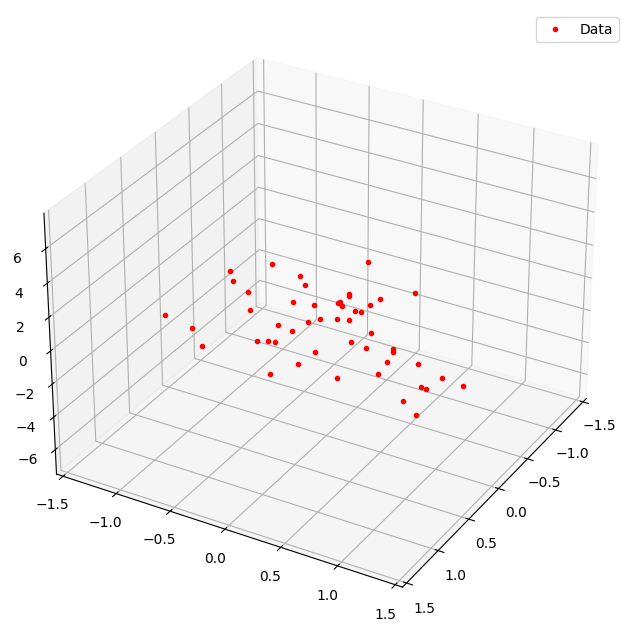

Done


In [7]:
def plot_train_data(x, y, angle1, angle2):
    assert X_data.shape == (50, 2)
    assert Y_data.shape == (50, 1)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    ax.plot3D(X_data[:, 0].flatten(), X_data[:, 1].flatten(), Y_data.flatten(), 'r.', label="Data")

    plt.legend()
    ax.set_xlim3d(-1.5, 1.5)
    ax.set_ylim3d(-1.5, 1.5)
    ax.view_init(angle1, angle2)
    plt.show()

angle1 = 30
angle2 = 30

plot_train_data(X_data, Y_data, angle1, angle2)
print("Done")

## 2. Basis Function Matrix
---
The columns of the output matrix (kernelized) represents a term in given function $f(x_1, x_2)$

In [8]:
def kernelize(X):
    n = X.shape[0]
    out = np.zeros((n,4))
    assert X.shape == (n, 2)

    # term for a
    out[:, 0] += np.ones(n)
    # term for b
    out[:, 1] += np.exp(X[:, 0])
    # term for c
    out[:, 2] += np.sin(X[:, 1])
    # term for d
    out[:, 3] += X[:, 0] * X[:, 1]

    return out

X_data_kernel = kernelize(X_data)
print(X_data_kernel.shape)
print("Done")

(50, 4)
Done


## 3. Numpy to PyTorch Transformation

In [9]:
X_data_tensor = torch.from_numpy(X_data_kernel.astype(np.float32))
Y_data_tensor = torch.from_numpy(Y_data.astype(np.float32))

assert X_data_tensor.shape == (50, 4)
assert Y_data_tensor.shape == (50, 1)

print("Done")

Done


## 4. Create a Linear Model

In [10]:
input_size = X_data_tensor.shape[1]
output_size = Y_data_tensor.shape[1]
model = nn.Linear(input_size, output_size, bias=False)

print(model.weight)
print(model.bias)
print("None")

Parameter containing:
tensor([[ 0.3442, -0.1773,  0.1786,  0.3980]], requires_grad=True)
None
None


## 5. Set Loss Function and Optimizing Methods

In [11]:
learning_rate = 1e-3
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print("Done")

Done


## 6. Train the model

In [12]:
num_epochs = 3000

for epoch in range(num_epochs):
    # Forward pass
    Y_pred_tensor = model(X_data_tensor)

    # Loss
    loss =loss_method(Y_pred_tensor, Y_data_tensor)

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Print progress
    if (epoch + 1) % 300 == 0:
        print(f"Epoch: {epoch+1}\tLoss = {loss.item():.5f}")

print("Done")

Epoch: 300	Loss = 8.03662
Epoch: 600	Loss = 7.13474
Epoch: 900	Loss = 6.38784
Epoch: 1200	Loss = 5.76711
Epoch: 1500	Loss = 5.25068
Epoch: 1800	Loss = 4.82056
Epoch: 2100	Loss = 4.46193
Epoch: 2400	Loss = 4.16257
Epoch: 2700	Loss = 3.91237
Epoch: 3000	Loss = 3.70298
Done


## 6. Plot the result

In [13]:
_, weight_dims = X_data_kernel.shape

weight = []

for i in range(weight_dims):
    weight.append(model.weight[0,i].item())

weight = np.array(weight)
assert weight.shape == (4, )

print(weight)
print("Done")

[-2.5938766   1.76922548 -0.36508292  1.96785545]
Done


## 7. Plot the result

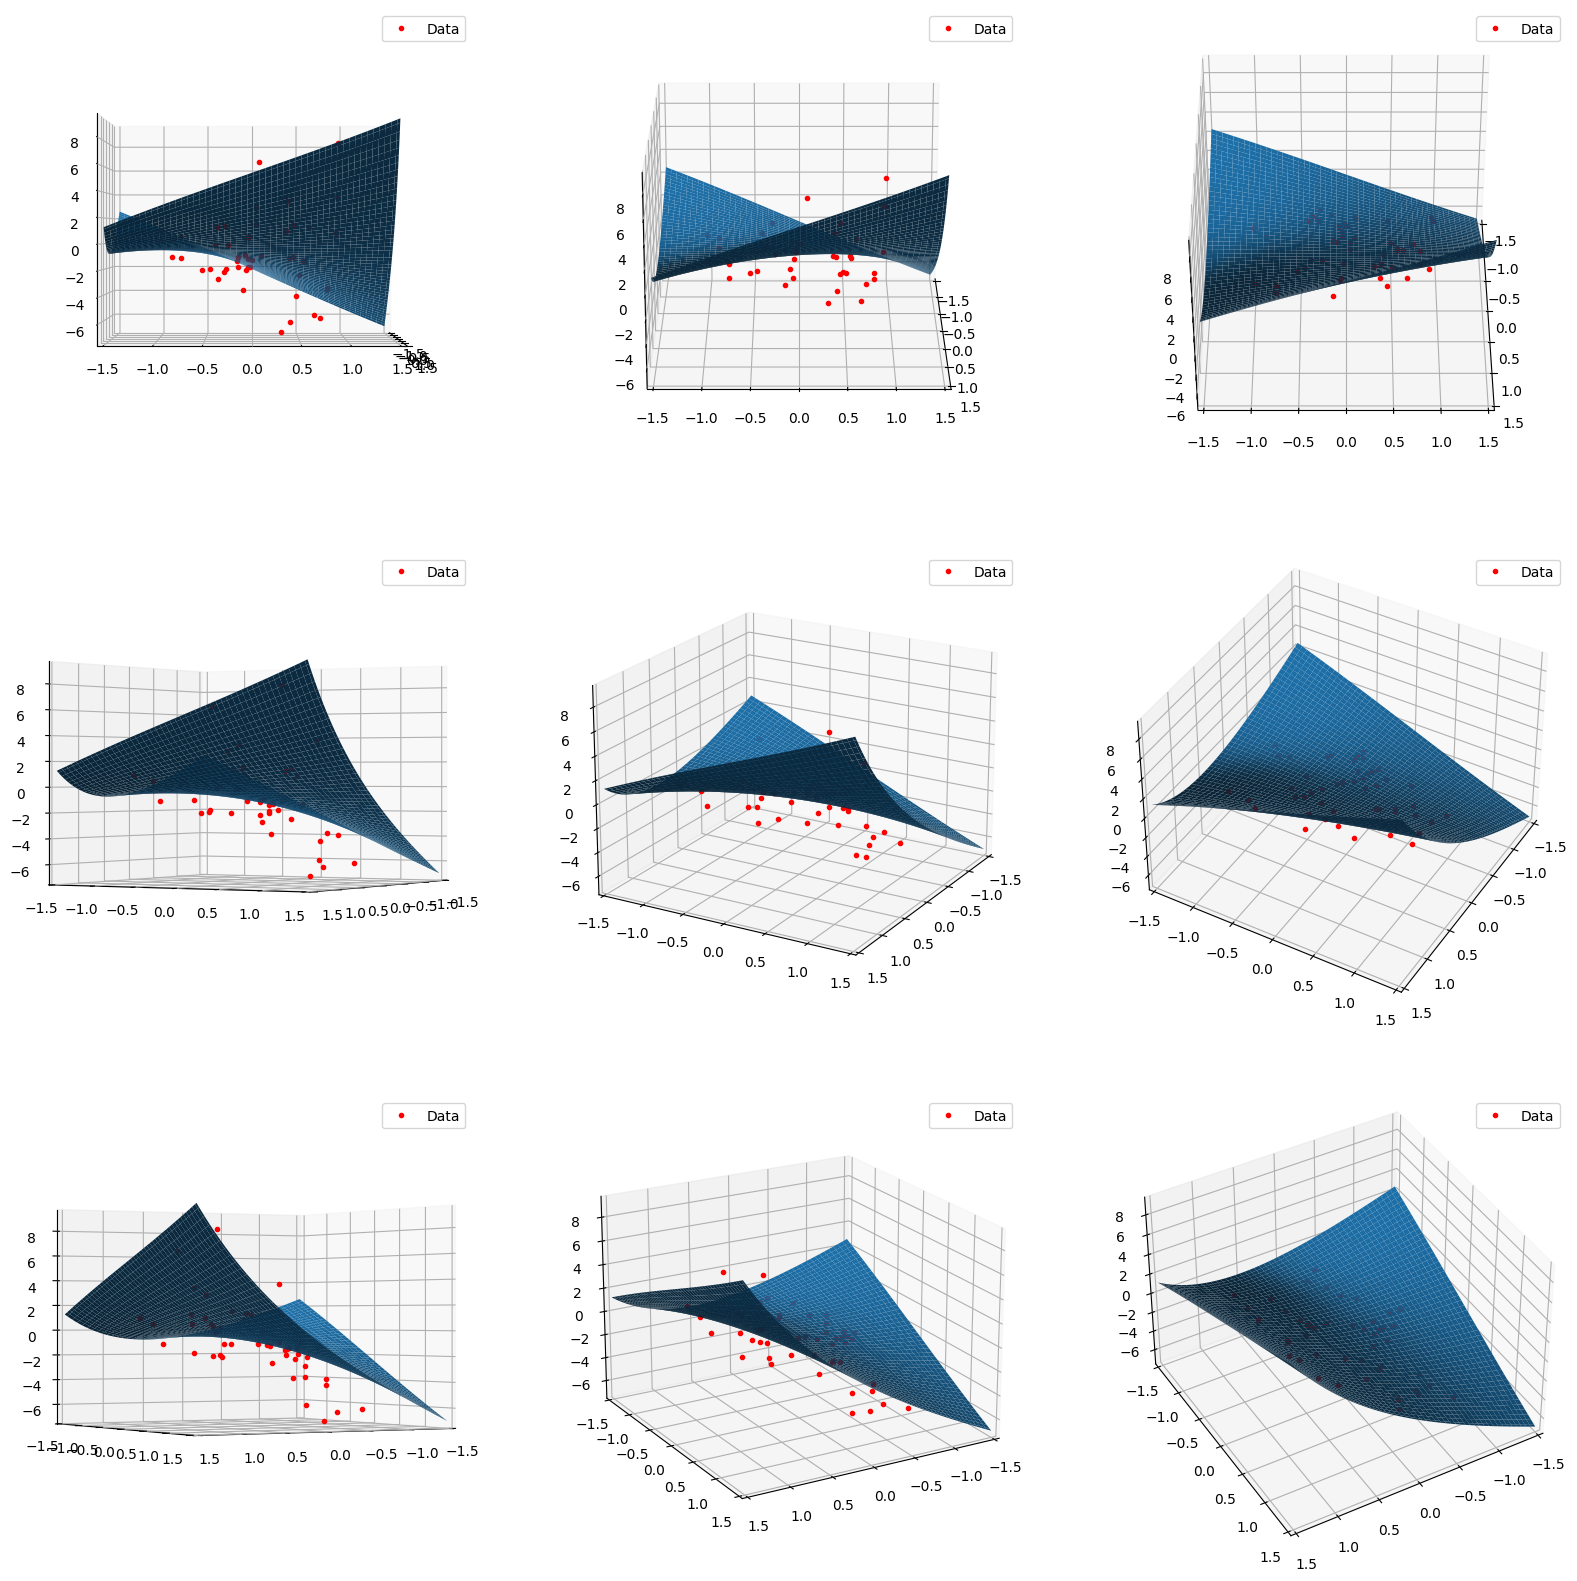

In [18]:
def plot_3D(X, y, w, x_low=-1.5, x_high=1.5):
    # Checking if parameters and dataset have correct conditions
    n = len(y)
    assert weight.shape == (4, )
    assert X.shape == (n, 2)
    assert y.shape == (n, 1)

    # Create surface points
    x1 = np.linspace(x_low, x_high, 100).reshape(-1, 1)
    x2 = np.linspace(x_low, x_high, 100).reshape(-1, 1)
    X2, X1 = np.meshgrid(x1, x2)

    X_true = kernelize(np.concatenate([np.reshape(X1, [-1, 1]), np.reshape(X2, [-1, 1])], axis=1))
    Y_true = np.zeros((100, 100))
    X_true_tensor = torch.from_numpy(X_true.astype(np.float32))
    Y_predict = model(X_true_tensor)

    k = 0
    for i in range(100):
        for j in range(100):
            Y_true[i, j] += Y_predict[k].item()
            k += 1

    # Create data points
    X_data = X.copy()
    Y_data = y.copy()
    x1_data = X_data[:, 0]
    x2_data =X_data[:, 1]

    # Plot
    fig = plt.figure(figsize=(20, 20))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i+1, projection='3d')
        ax.plot_surface(X1, X2, Y_true)
        ax.plot3D(x1_data.flatten(), x2_data.flatten(), Y_data.flatten(), 'r.', label="Data")

        plt.legend()
        ax.set_xlim3d(x_low, x_high)
        ax.set_ylim3d(x_low, x_high)
        ax.view_init((i%3)*20, (i//3)*30)

    plt.show()

plot_3D(X_data, Y_data, weight)